## Observations and Insights

LaTeX: 𝛼2

Observation 1: For average weight in grams, the Placebo and Ketapril drugs had the highest average. The drug of choice, Capomulin had the second lowest average weight in grams; the drug Ramicane had the lowest.
Observation 2: The sex of the mice was almost equal, there was one more male mouse than female.
Observation 3: There is a positive correlation with the higher the mouse weight the higher the average tumor volume was.

## Dependencies and starter code

In [152]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset


## Summary statistics

In [153]:
mouse_metadata = mouse_metadata.rename(columns={"Weight (g)": "Weight in Grams"})
study_results = study_results.rename(columns= {"Tumor Volume (mm3)": "Tumor Volume_mm3"})

In [154]:
mouse_metadata = mouse_metadata.rename(columns={"Weight (g)": "Weight in Grams"})
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight in Grams
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [155]:

new_df = pd.DataFrame()

for name in mouse_metadata['Drug Regimen'].unique():
    only_Naftisol = mouse_metadata.loc[mouse_metadata ["Drug Regimen"] == name, :]
    mon = only_Naftisol["Weight in Grams"].mean()
    med = only_Naftisol["Weight in Grams"].median()
    mod = only_Naftisol["Weight in Grams"].mode()
    var = np.var(only_Naftisol,ddof = 0)['Weight in Grams']
    sem = only_Naftisol['Weight in Grams'].sem()
    new_df = new_df.append(pd.Series({'Drug':name, 'Mean':mon,'Median':med, 
                                      'Mode':mod, 'Variance':var, 'SEM':sem}),ignore_index =True)

In [156]:
new_df

,Drug,Mean,Median,Mode,SEM,Variance
0,Ramicane,20.000,19.0,0 17 dtype: int64,0.670820,10.800000
1,Capomulin,20.120,21.0,0 17 dtype: int64,0.572480,7.865600
2,Infubinol,27.320,27.0,0 25 1 30 dtype: int64,0.434818,4.537600
3,Placebo,28.040,28.0,0 30 dtype: int64,0.389358,3.638400
4,Ceftamin,27.400,28.0,0 28 dtype: int64,0.336650,2.720000
5,Stelasyn,27.875,28.0,0 27 1 29 2 30 dtype: int64,0.342161,2.692708
6,Zoniferol,27.920,28.0,0 28 1 29 dtype: int64,0.305068,2.233600
7,Ketapril,28.080,29.0,0 30 dtype: int64,0.373809,3.353600
8,Propriva,27.240,27.0,0 26 dtype: int64,0.342929,2.822400
9,Naftisol,27.240,27.0,0 27 dtype: int64,0.307029,2.262400


## Bar plots

Text(0, 0.5, 'Counts')

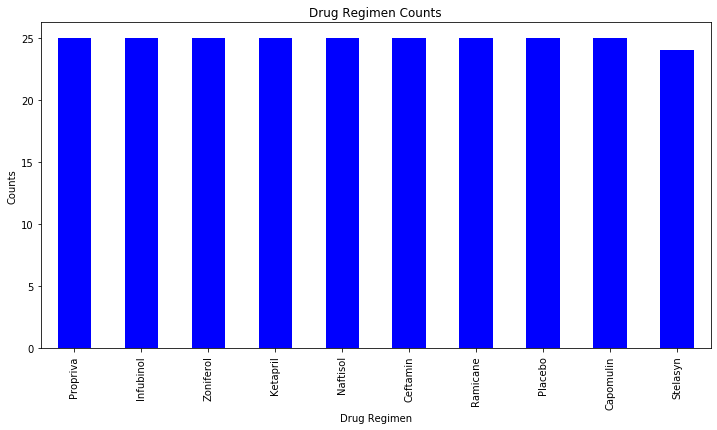

In [157]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
bar4regimen = mouse_metadata ["Drug Regimen"].value_counts()

bar4regimen.plot(kind="bar", facecolor="blue", figsize=(12,6))

plt.title("Drug Regimen Counts")
plt.xlabel("Drug Regimen")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

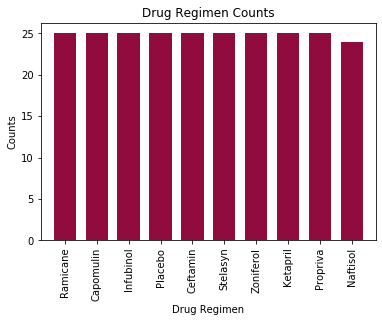

In [158]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = mouse_metadata ["Drug Regimen"].unique()
tick_locations = [value for value in x_axis]                   
plt.bar(x_axis, mouse_metadata ["Drug Regimen"].value_counts(), color="#900C3F", align="center", width =.7)
plt.xticks(tick_locations, mouse_metadata ["Drug Regimen"].unique() , rotation = 'vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.title("Drug Regimen Counts")
plt.xlabel("Drug Regimen")
plt.ylabel("Counts")

In [159]:
x_axis

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

## Pie plots

Text(0.5, 1.0, 'Male and Female Mouse Counts')

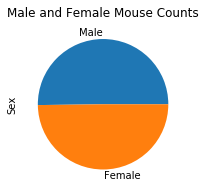

In [160]:

df = mouse_metadata['Sex'].value_counts()
plot = df.plot.pie(subplots=True, figsize=(6, 3))
plt.title("Male and Female Mouse Counts")

In [161]:
df

Male      125
Female    124
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Male and Female Mouse Counts')

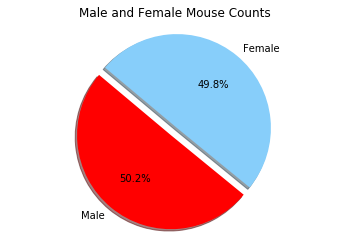

In [162]:

#groupedby_df = df.groupby(['Sex'])


plt.pie( df, explode = (0.1, 0), labels = mouse_metadata['Sex'].unique (), colors = ["red","lightskyblue"], autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Male and Female Mouse Counts")

## Quartiles, outliers and boxplots

1. Going through each of the mouse
2. from each of the mouse table - you can sort it by the timepoint (add in reset index)
3. take either the very first or last depending on the sort
4. take the column

In [163]:
# Calculate the final tumor volume of each mouse across Capomulin, Ramicane, Infubinol, and Ceftamin
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

name = "N"
final_tv = pd.DataFrame()

combined_mouse_study = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

only_4 =  combined_mouse_study[combined_mouse_study ["Drug Regimen"]\
                               .isin (["Capomulin","Ramicane","Infubinol","Ceftamin"])]

#once you start the for loop it will create a mini table of just one mouse. Then you sort the values to be descending 
#to grab the last row. Since each loop could have different rows, re-index the numbers so it will start with 0
#(that's why it is in the loc position to grab the first one).
#now that it is re=indexed, grab Tumor Volume. 

for name in only_4 ['Mouse ID'].unique():
    one_mouse_study = only_4[only_4 ["Mouse ID"]==name]
    tvm = one_mouse_study.sort_values(by='Timepoint', ascending=False).reset_index().loc[0]['Tumor Volume_mm3']
    final_tv = final_tv.append(pd.DataFrame(pd.Series({'Final Tumor Volume':tvm})).T)

    


In [164]:
only_4

,Mouse ID,Drug Regimen,Sex,Age_months,Weight in Grams,Timepoint,Tumor Volume_mm3,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [165]:
final_tv['Final Tumor Volume']

0    22.050126
0    23.343598
0    28.484033
0    28.430964
0    29.128472
       ...    
0    61.386660
0    67.685569
0    68.594745
0    64.729837
0    62.754451
Name: Final Tumor Volume, Length: 100, dtype: float64

In [166]:
#quartiles need a series- to make a series add the column title after your DataFrame
quartiles = final_tv['Final Tumor Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of tumor volumes is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")
print(f"The the median of tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

The lower quartile of tumor volumes is: 37.187743802499995
The upper quartile of tumor volumes is: 59.930261755000004
The interquartile range of tumor volumes is: 22.74251795250001
The the median of tumor volumes is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


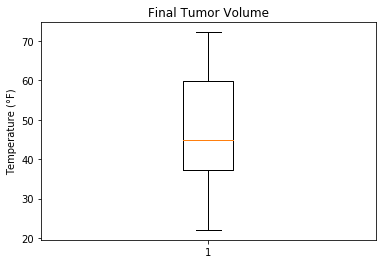

In [167]:
# Generate a box plot of the final tumor volume of each mouse across Capomulin, Ramicane, Infubinol, and Ceftamin
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Temperature (°F)')
#boxplot takes a series- meaning final_tv is a dataframe, but I had to add the column name to make it a series
ax1.boxplot(final_tv['Final Tumor Volume'])
plt.show()

## Line and scatter plots

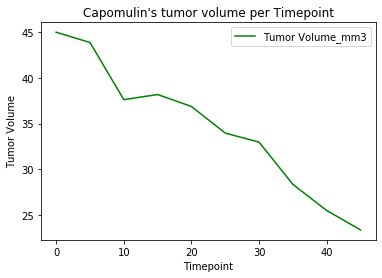

In [168]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

one_mouse_study = combined_mouse_study.loc[combined_mouse_study ["Mouse ID"]=="s185",:]

only_Capomulin = one_mouse_study.loc[one_mouse_study ["Drug Regimen"] == "Capomulin", :]

only_ctv = only_Capomulin ["Tumor Volume_mm3"]

Timepoint = one_mouse_study["Timepoint"]

plt.plot(Timepoint,only_ctv, color="green", label="Tumor Volume_mm3")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Capomulin's tumor volume per Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.show()


In [169]:

onlyc = combined_mouse_study.loc[combined_mouse_study["Drug Regimen"] == "Capomulin",:]
weightavg = onlyc.groupby(["Mouse ID"], as_index=False)["Weight in Grams"].mean()
tumoravg = onlyc.groupby(["Mouse ID"], as_index=False)["Tumor Volume_mm3"].mean()


for name in combined_mouse_study['Mouse ID'].unique():
    only_N1 = combined_mouse_study[combined_mouse_study["Mouse ID"]== name]
    tvavg = only_Nl["Tumor Volume_mm3"].mean()
    wavg = only_Nl["Weight in Grams"].mean()
    n_df = n_df.append(pd.DataFrame(pd.Series({'Mouse ID':name, 'Mean':tvavg, 'Weight':wavg})).T)

    print (n_df)


   Mouse ID     Mean   Weight
0      k403  40.6757  19.9652
0      s185  40.6757  19.9652
0      x401  40.6757  19.9652
0      m601  40.6757  19.9652
0      g791  40.6757  19.9652
..      ...      ...      ...
0      z435  40.6757  19.9652
0      z581  40.6757  19.9652
0      z795  40.6757  19.9652
0      z969  40.6757  19.9652
0      k403  40.6757  19.9652

[499 rows x 3 columns]
   Mouse ID     Mean   Weight
0      k403  40.6757  19.9652
0      s185  40.6757  19.9652
0      x401  40.6757  19.9652
0      m601  40.6757  19.9652
0      g791  40.6757  19.9652
..      ...      ...      ...
0      z581  40.6757  19.9652
0      z795  40.6757  19.9652
0      z969  40.6757  19.9652
0      k403  40.6757  19.9652
0      s185  40.6757  19.9652

[500 rows x 3 columns]
   Mouse ID     Mean   Weight
0      k403  40.6757  19.9652
0      s185  40.6757  19.9652
0      x401  40.6757  19.9652
0      m601  40.6757  19.9652
0      g791  40.6757  19.9652
..      ...      ...      ...
0      z795  40.6757  

[556 rows x 3 columns]
   Mouse ID     Mean   Weight
0      k403  40.6757  19.9652
0      s185  40.6757  19.9652
0      x401  40.6757  19.9652
0      m601  40.6757  19.9652
0      g791  40.6757  19.9652
..      ...      ...      ...
0      a401  40.6757  19.9652
0      a457  40.6757  19.9652
0      a492  40.6757  19.9652
0      a577  40.6757  19.9652
0      a685  40.6757  19.9652

[557 rows x 3 columns]
   Mouse ID     Mean   Weight
0      k403  40.6757  19.9652
0      s185  40.6757  19.9652
0      x401  40.6757  19.9652
0      m601  40.6757  19.9652
0      g791  40.6757  19.9652
..      ...      ...      ...
0      a457  40.6757  19.9652
0      a492  40.6757  19.9652
0      a577  40.6757  19.9652
0      a685  40.6757  19.9652
0      a699  40.6757  19.9652

[558 rows x 3 columns]
   Mouse ID     Mean   Weight
0      k403  40.6757  19.9652
0      s185  40.6757  19.9652
0      x401  40.6757  19.9652
0      m601  40.6757  19.9652
0      g791  40.6757  19.9652
..      ...      ...      ...

[611 rows x 3 columns]
   Mouse ID     Mean   Weight
0      k403  40.6757  19.9652
0      s185  40.6757  19.9652
0      x401  40.6757  19.9652
0      m601  40.6757  19.9652
0      g791  40.6757  19.9652
..      ...      ...      ...
0      h333  40.6757  19.9652
0      h428  40.6757  19.9652
0      h531  40.6757  19.9652
0      i386  40.6757  19.9652
0      i477  40.6757  19.9652

[612 rows x 3 columns]
   Mouse ID     Mean   Weight
0      k403  40.6757  19.9652
0      s185  40.6757  19.9652
0      x401  40.6757  19.9652
0      m601  40.6757  19.9652
0      g791  40.6757  19.9652
..      ...      ...      ...
0      h428  40.6757  19.9652
0      h531  40.6757  19.9652
0      i386  40.6757  19.9652
0      i477  40.6757  19.9652
0      i635  40.6757  19.9652

[613 rows x 3 columns]
   Mouse ID     Mean   Weight
0      k403  40.6757  19.9652
0      s185  40.6757  19.9652
0      x401  40.6757  19.9652
0      m601  40.6757  19.9652
0      g791  40.6757  19.9652
..      ...      ...      ...

[663 rows x 3 columns]
   Mouse ID     Mean   Weight
0      k403  40.6757  19.9652
0      s185  40.6757  19.9652
0      x401  40.6757  19.9652
0      m601  40.6757  19.9652
0      g791  40.6757  19.9652
..      ...      ...      ...
0      o795  40.6757  19.9652
0      o809  40.6757  19.9652
0      o813  40.6757  19.9652
0      o848  40.6757  19.9652
0      o926  40.6757  19.9652

[664 rows x 3 columns]
   Mouse ID     Mean   Weight
0      k403  40.6757  19.9652
0      s185  40.6757  19.9652
0      x401  40.6757  19.9652
0      m601  40.6757  19.9652
0      g791  40.6757  19.9652
..      ...      ...      ...
0      o809  40.6757  19.9652
0      o813  40.6757  19.9652
0      o848  40.6757  19.9652
0      o926  40.6757  19.9652
0      o973  40.6757  19.9652

[665 rows x 3 columns]
   Mouse ID     Mean   Weight
0      k403  40.6757  19.9652
0      s185  40.6757  19.9652
0      x401  40.6757  19.9652
0      m601  40.6757  19.9652
0      g791  40.6757  19.9652
..      ...      ...      ...

[716 rows x 3 columns]
   Mouse ID     Mean   Weight
0      k403  40.6757  19.9652
0      s185  40.6757  19.9652
0      x401  40.6757  19.9652
0      m601  40.6757  19.9652
0      g791  40.6757  19.9652
..      ...      ...      ...
0      v991  40.6757  19.9652
0      w140  40.6757  19.9652
0      w151  40.6757  19.9652
0      w167  40.6757  19.9652
0      w193  40.6757  19.9652

[717 rows x 3 columns]
   Mouse ID     Mean   Weight
0      k403  40.6757  19.9652
0      s185  40.6757  19.9652
0      x401  40.6757  19.9652
0      m601  40.6757  19.9652
0      g791  40.6757  19.9652
..      ...      ...      ...
0      w140  40.6757  19.9652
0      w151  40.6757  19.9652
0      w167  40.6757  19.9652
0      w193  40.6757  19.9652
0      w350  40.6757  19.9652

[718 rows x 3 columns]
   Mouse ID     Mean   Weight
0      k403  40.6757  19.9652
0      s185  40.6757  19.9652
0      x401  40.6757  19.9652
0      m601  40.6757  19.9652
0      g791  40.6757  19.9652
..      ...      ...      ...

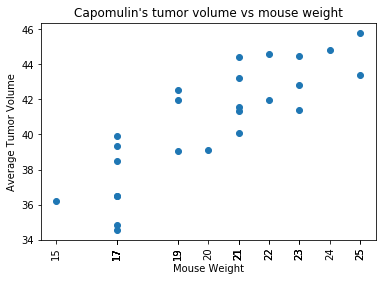

In [170]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

weight = weightavg ['Weight in Grams']
tumorv = tumoravg ['Tumor Volume_mm3']
plt.scatter(weight,tumorv)
plt.xticks(weight, rotation=90)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.title("Capomulin's tumor volume vs mouse weight")
plt.show()

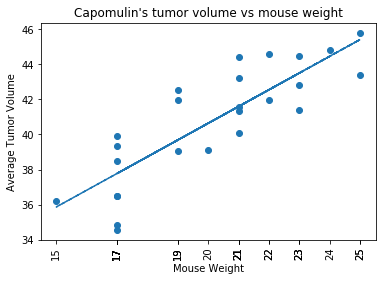

In [171]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for 
#the Capomulin regimen

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(weight, tumorv)
vc_fit = vc_slope * weight + vc_int    
weight = weightavg ['Weight in Grams']
tumorv = tumoravg ['Tumor Volume_mm3']
plt.scatter(weight,tumorv)
plt.plot(weight,vc_fit,"--")
plt.xticks(weight, rotation=90)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.title("Capomulin's tumor volume vs mouse weight")
plt.show()


In [172]:
vc_r

0.8419363424694718